             timestamp   observed_timestamp                           id  \
0  1714750043000000000  1714750043213385385  2fxVpIEdOkEKkTsSs1rPt7FEH2u   
1  1714750043000000000  1714750043215915002  2fxVpIEdOkEKkTsSs1rPt7FEH2v   
2  1714750043000000000  1714750043216028292  2fxVpIEdOkEKkTsSs1rPt7FEH2w   
3  1714750043000000000  1714750043216760392  2fxVpIEdOkEKkTsSs1rPt7FEH2x   
4  1714750043000000000  1714750043216854493  2fxVpIEdOkEKkTsSs1rPt7FEH2y   

  trace_id span_id  trace_flags severity_text  severity_number  \
0      NaN     NaN            0           NaN                0   
1      NaN     NaN            0           NaN                0   
2      NaN     NaN            0           NaN                0   
3      NaN     NaN            0           NaN                0   
4      NaN     NaN            0           NaN                0   

                                                body resources_string_key  \
0  [2024-05-03 15:27:23,209] INFO [Controller 1] ...                 

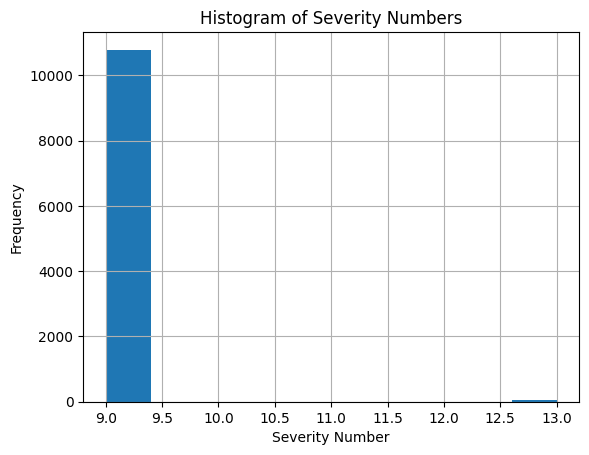

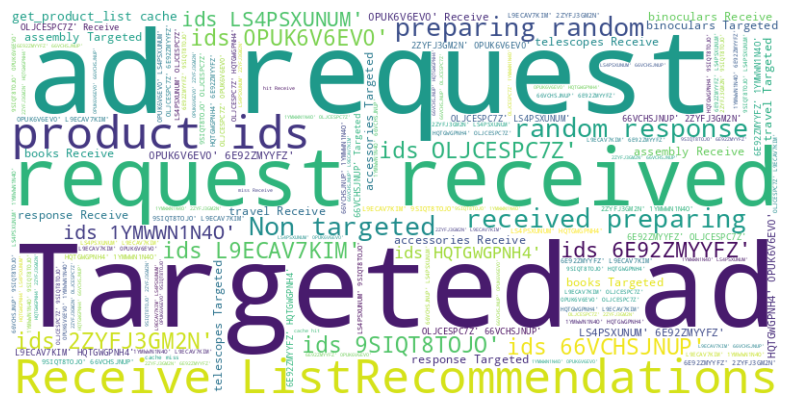

                    observed_timestamp  trace_flags  severity_number
observed_timestamp            1.000000          NaN         0.089222
trace_flags                        NaN          NaN              NaN
severity_number               0.089222          NaN         1.000000


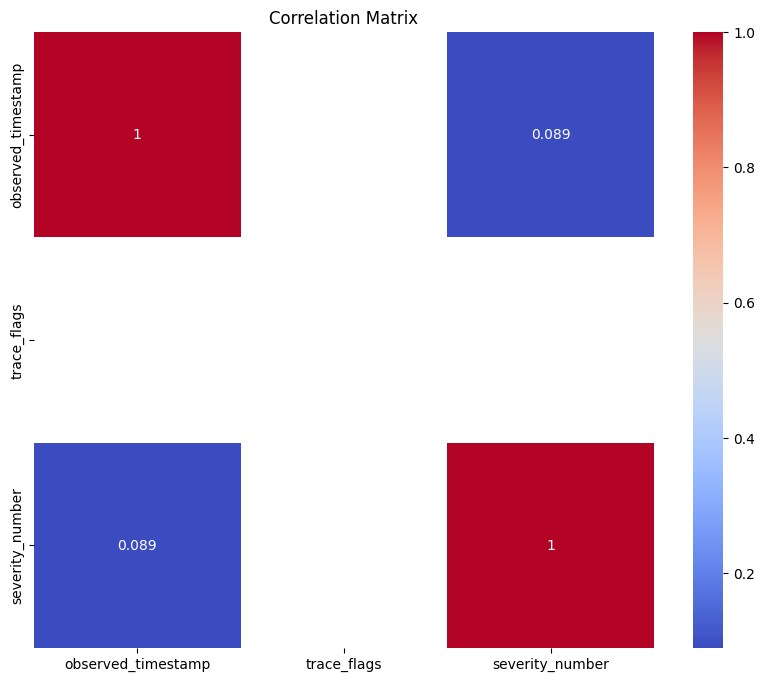

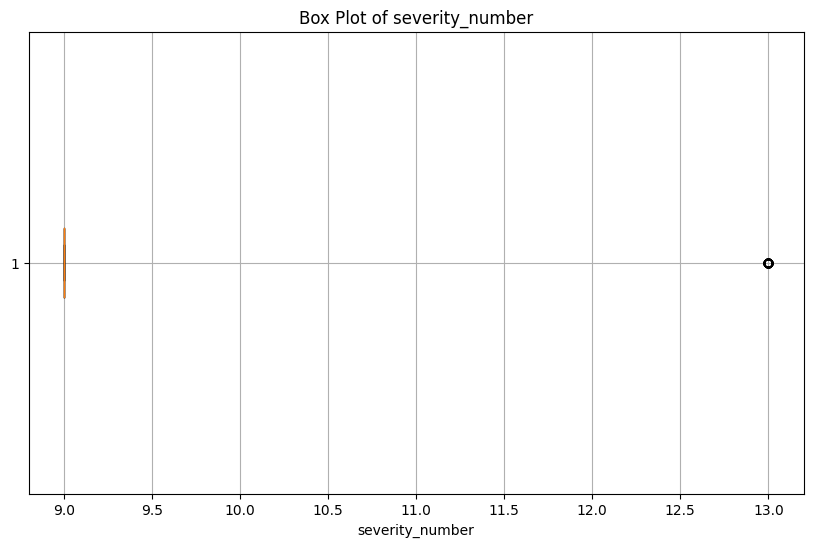

In [28]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('logs.csv')

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to verify column names and initial data
print(df.head())

# Check the range of the 'timestamp' column
print(df['timestamp'].describe())

# Convert 'timestamp' column from nanoseconds to seconds
df['timestamp'] = df['timestamp'] / 1e9

# Convert 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

# Drop rows where 'timestamp' conversion failed
df = df.dropna(subset=['timestamp'])

# Display the first few rows to ensure the conversion worked
print(df.head())

# Data Cleaning
print(df.isnull().sum())
df = df.dropna()  # Or use df.fillna() to fill missing values
print(df.dtypes)

# Exploratory Data Analysis (EDA)
print(df.describe())

# Visualize Distributions
import matplotlib.pyplot as plt

# Histogram for severity numbers
df['severity_number'].hist()
plt.xlabel('Severity Number')
plt.ylabel('Frequency')
plt.title('Histogram of Severity Numbers')
plt.show()

# Analyze Text Data
from wordcloud import WordCloud
text = ' '.join(df['body'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Correlation Analysis
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns
correlation_matrix = numeric_df.corr()

# Print and visualize the correlation matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Choose a numerical column for box plot
# Replace 'severity_number' with the actual column name you want to visualize
numerical_column = 'severity_number'

# Create a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(df[numerical_column].dropna(), vert=False)
plt.xlabel(numerical_column)
plt.title(f'Box Plot of {numerical_column}')
plt.grid(True)
plt.show()







